  <div style='width: calc(100% - 4rem); font-size: 1.75rem; font-weight: bold; background: darkred;padding: 2rem; border-radius: 1rem; color: white; text-align: center; margin-bottom: 2rem'> Lights, Camera, Data! A Storytelling Approach to Netflix Content! ✨🎥📈</div>

<div style='font-size:1rem; color:#003049'>Netflix has become the leading platform in entertainment, despite the rise of other streaming services, offering a vast and diverse catalog of movies and TV shows, including both third-party content and original productions. Surpassing 300 million subscribers worldwide, Netflix's success is driven by its content strategy, which differentiates it from alternative platforms. Understanding trends in content type and their evolution over time can provide valuable insights into viewer preferences, regional differences, and the strategies behind Netflix's success.<br><br>

This project aims to explore Netflix's content library and its trends over time, from its inception to 2020—just before the impact of COVID-19—using data visualization techniques. These visualizations will help us analyze genre popularity, release trends, top 10 rankings across various categories, and more. We will investigate questions such as:

* How has Netflix and its content library evolved over the years?
* What kind of content can we found on the platform?
* Who are the most prolific directors and stars?

By leveraging Python libraries like Pandas, Matplotlib, and Seaborn, we will transform raw data into engaging, highly customized visual narratives.
</div>

<center>
<div style="
    background-color: #FFF0A5; 
    border: 2px solid #F7E38B; 
    border-radius: 5px; 
    padding: 15px; 
    box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1); 
    display: inline-block;
    margin: 5px auto;
">
    If you like my work, please give me an Upvote and comment! 👍 🙏
</div>
</center>

In [1]:
# Install dependencies
!pip install rembg onnxruntime > /dev/null 2>&1;

In [2]:
# Import python libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from pandas.api.types import CategoricalDtype
from matplotlib.offsetbox import AnchoredText, TextArea, VPacker, HPacker
from matplotlib.offsetbox import AnchoredOffsetbox
from bs4 import BeautifulSoup
from rembg import remove
from PIL import Image
import requests
import os
import geopandas as gpd 
import zipfile
from matplotlib.offsetbox import OffsetImage, OffsetBox
from matplotlib.offsetbox import HPacker
from matplotlib import patheffects
from matplotlib.patches import Arc
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from itertools import combinations, product


USER_AGENT = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'


def remove_background(input_path, output_path):
    """
    Removes the background from an image and saves the result to a new file.

    Parameters:
    -----------
    input_path : str
        Path to the input image file.
    output_path : str
        Path where the image without background will be saved.

    Raises:
    -------
    FileNotFoundError:
        If the input image file does not exist.
    Exception:
        For any other unexpected errors during processing.
    """
    try:
        with open(input_path, 'rb') as input_file:
            input_data = input_file.read()
            output_data = remove(input_data)

        with open(output_path, 'wb') as output_file:
            output_file.write(output_data)

    except FileNotFoundError:
        print(f"Error: Input image not found at path: {input_path}")
    except Exception as e:
        print(f"An error occurred while removing the background: {e}")
        

def fetch_image(image_url=None, name=None, path='/kaggle/working',
                default='https://cdn-icons-png.flaticon.com/512/1253/1253756.png',
                remove_bg=True):
    """
    Downloads an image from a given URL or from a Wikipedia page using a person's name.
    Optionally removes the background of the image.

    Parameters:
    -----------
    image_url : str, optional
        Direct URL of the image to download.
    name : str, optional
        Name of a person to search for on the Spanish Wikipedia (e.g., "Lionel_Messi").
    path : str, optional
        Local directory to save the image. Default is '/kaggle/working'.
    default : str, optional
        URL to a default image if no valid image is found.
    remove_bg : bool, optional
        Whether to remove the background from the image using `remove_background`.

    Returns:
    --------
    str
        Local path to the saved image (with background removed if `remove_bg=True`).

    Raises:
    -------
    ValueError:
        If neither `image_url` nor `name` is provided.
    RuntimeError:
        If the image URL is invalid or downloading fails.
    """
    if not (image_url or name):
        raise ValueError('You must provide either `image_url` or `name`.')

    # If a name is provided, search for the image on Wikipedia
    if name:
        wiki_url = f'https://es.wikipedia.org/wiki/{name.strip().replace(" ", "_")}'
        response = requests.get(wiki_url, headers={'User-Agent': USER_AGENT})
        if response.status_code != 200:
            raise RuntimeError(f'Failed to access Wikipedia: {wiki_url}')
        
        soup = BeautifulSoup(response.content, 'html.parser')
        img_tag = soup.select_one('.biography .imagen img')
        
        if img_tag and 'src' in img_tag.attrs:
            image_url = 'https:' + img_tag['src']
        else:
            image_url = default

    # Download and save the image
    try:
        image_name = image_url.split('/')[-1]
        image_path = os.path.join(path, image_name)
        response = requests.get(image_url, headers={'User-Agent': USER_AGENT})
        response.raise_for_status()
        with open(image_path, 'wb') as f:
            f.write(response.content)
    except Exception as e:
        raise RuntimeError(f'Failed to download image: {e}')

    # Remove background if requested
    if remove_bg:
        bg_removed_image_path = os.path.join(path, f'br_{image_name}')
        remove_background(image_path, bg_removed_image_path)
        return bg_removed_image_path
    else:
        return image_path

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        continue
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

def check_collision(patch1, patch2):
    """
    Check if two FancyBboxPatch instances collide.

    Parameters:
        patch1 (matplotlib.patches.FancyBboxPatch): First patch.
        patch2 (matplotlib.patches.FancyBboxPatch): Second patch.

    Returns:
        bool: True if the patches collide, False otherwise.
    """
    # Get the bounding boxes of the two patches
    bbox1 = patch1.get_extents()
    bbox2 = patch2.get_extents()

    # Check for overlap
    return not (
        bbox1.xmax < bbox2.xmin or  # Patch1 is to the left of Patch2
        bbox1.xmin > bbox2.xmax or  # Patch1 is to the right of Patch2
        bbox1.ymax < bbox2.ymin or  # Patch1 is below Patch2
        bbox1.ymin > bbox2.ymax     # Patch1 is above Patch2
    )



In [3]:
# Fetch data for maps
os.makedirs('/kaggle/temp', exist_ok=True)

url_shapefile = 'https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp?lang=en&timezone=America%2FGuatemala'
path_shapefile_zip  = '/kaggle/temp/world_shapefile.zip'
path_shapefile_content = '/kaggle/temp/world_shapefile'

downloaded_content = requests.get(url_shapefile).content
with open(path_shapefile_zip, 'wb') as f:
    f.write(downloaded_content)

os.makedirs(path_shapefile_content, exist_ok=True)
with zipfile.ZipFile(path_shapefile_zip) as zip_file:
    zip_file.extractall(path_shapefile_content)

shapefile_path = os.path.join(path_shapefile_content, 'ne_110m_admin_0_countries.shp')
gdf_world = gpd.read_file(path_shapefile_content)

In [4]:
# Clean and Preprocess data
netflix_data = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netflix_data['date_added'] = pd.to_datetime(netflix_data.date_added, format='mixed')

# Insert NULL Values
netflix_data.loc[[5541, 5794, 5813], 'duration'] = ['74 min', '84 min', '66 min']
netflix_data.loc[[5989, 6827, 7312, 7537], 'rating'] = ['TV-PG', 'TV-14', 'TV-G', 'PG-13']
netflix_data.loc[[5541, 5794, 5813], 'rating'] = ['TV-MA', 'TV-MA', 'TV-MA']
netflix_data['rating'] = netflix_data['rating'].str.replace('-FV', '').str.replace('UR', 'NR')


# Correcting country names
netflix_data['country'] = netflix_data['country'].str.replace('United States', 'United States of America')
netflix_data['country'] = netflix_data['country'].str.replace('United Kingdom', 'U.K. of Great Britain and Northern Ireland')
netflix_data['country'] = netflix_data['country'].str.replace('South Korea', 'Republic of Korea')
netflix_data['country'] = netflix_data['country'].str.replace('Russia', 'Russian Federation')
netflix_data['country'] = netflix_data['country'].str.replace('Iran', 'Iran (Islamic Republic of)')
netflix_data['country'] = netflix_data['country'].str.replace('West Germany', 'Germany')
netflix_data['country'] = netflix_data['country'].str.replace('Syria', 'Syrian Arab Republic')
netflix_data['country'] = netflix_data['country'].str.replace('Vatican City', 'Holy See')
netflix_data['country'] = netflix_data['country'].str.replace('East Germany', 'Germany')
netflix_data['country'] = netflix_data['country'].str.replace('Palestine', 'West Bank')
netflix_data['country'] = netflix_data['country'].str.replace('Soviet Union', 'Russian Federation')

# Convert to category dtypes
netflix_data['rating'] = netflix_data['rating'].astype('category')
netflix_data['rating'] = pd.Categorical(
    netflix_data['rating'],
    categories=['TV-Y', 'TV-Y7', 'G', 'TV-G', 'PG', 'TV-PG', 'PG-13', 'TV-14', 'R', 'TV-MA', 'NC-17', 'NR'],
    ordered=True    
)
netflix_data['rating_classes'] = netflix_data.rating.cat.rename_categories({
    'TV-Y': 'Kids1',
    'TV-Y7': 'Kids2',
    'G': 'Kids3',
    'TV-G': 'Kids4',
    'PG': 'Kids5',
    'TV-PG': 'Kids6',
    'PG-13': 'Teens7',
    'TV-14': 'Teens8',
    'R': 'Adults9',
    'TV-MA': 'Adults0',
    'NC-17': 'Adultsa',
}).str[:-1]

# <div style='color: #8B0000; font-size:2rem'>➡︎ Introduction</div>

## <div style='color: #8B0000'> Netflix Through Time: From Small Company to Global Phenomenon</div>

<div style='font-size:1.1rem; color:#003049'>
<b style='font-weight: bold; color: darkred'>Netflix was created in 1997 </b> by Reed Hastings and Marc Randolph, born out of frustration with late fees at their local video store. Initially, <b style='font-weight: bold; color: darkred'>it was founded as a novel concept – a mail-order DVD rental service</b> where customers could subscribe and receive DVDs by mail, revolutionizing how people accessed movies.
<br><br>
Despite criticism from many people and its competitors, Netflix gained traction, leveraging the internet to build a user-friendly platform and a recommendation system based on customer ratings and viewing history, surpassing 1 million subscribers in 2003
</div>

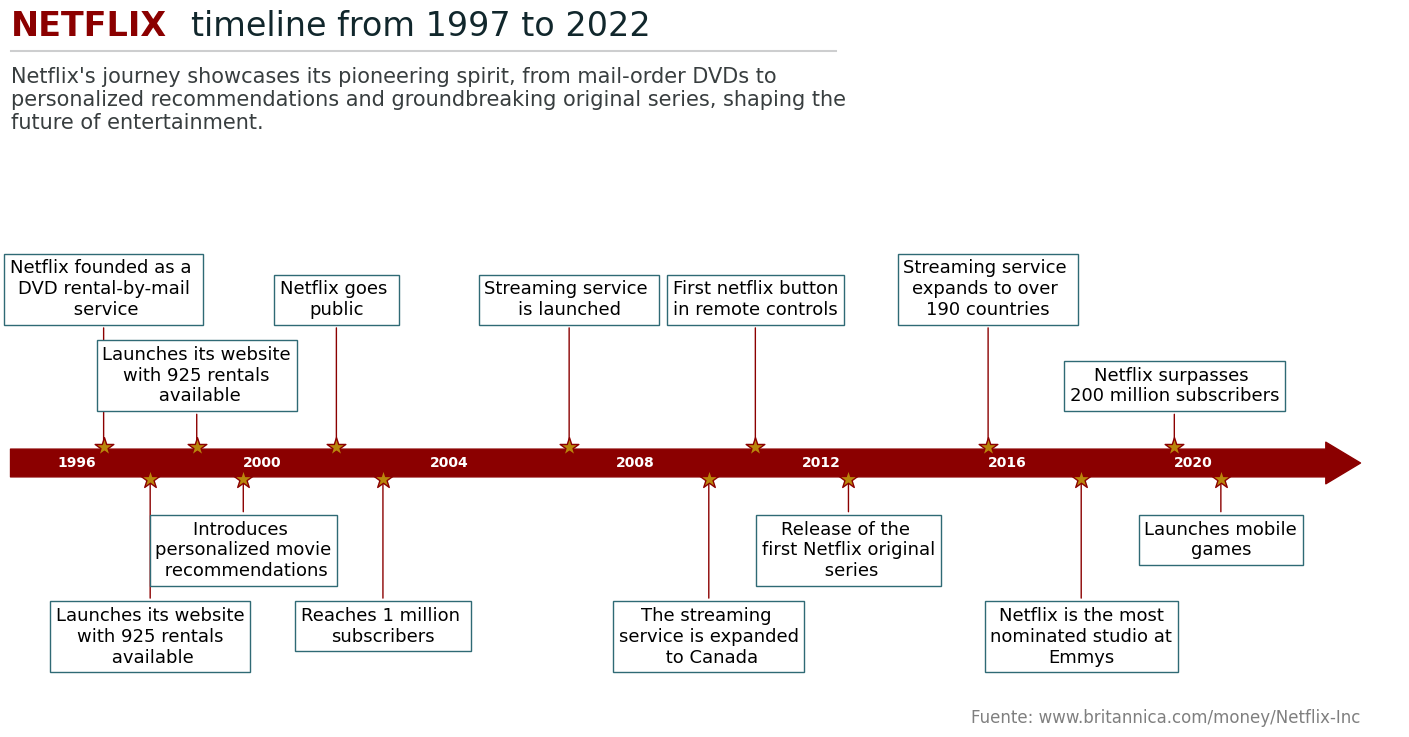

In [5]:
 fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(top=0.6, bottom=0.15, left=0.05, right=0.95)
fig.text(s='NETFLIX', x=0.05, y=0.9, ha='left', va='bottom', fontsize=24, fontweight='bold', color='darkred')
fig.text(s='timeline from 1997 to 2022', x=0.17, y=0.90, ha='left', va='bottom', fontsize=24, color='#11272C')
fig.add_artist(plt.Line2D([0.05, 0.6], [0.89, 0.89], color='#060D0F', alpha=0.2))
fig.text(
s="""Netflix's journey showcases its pioneering spirit, from mail-order DVDs to 
personalized recommendations and groundbreaking original series, shaping the
future of entertainment.""", x=.05, y=0.87, ha='left', va='top', fontsize=15, color='#060D0F', alpha=0.8
)

# Timeline data to plot
timeline = {
    1997: 'Netflix founded as a \nDVD rental-by-mail\n service',
    1998: 'Launches its website\nwith 925 rentals\n available',
    1999: 'Launches its website\nwith 925 rentals\n available',
    2000: 'Introduces \npersonalized movie\n recommendations',
    2002: 'Netflix goes \npublic',
    2003: 'Reaches 1 million \nsubscribers',
    2007: 'Streaming service \nis launched',
    2010: 'The streaming \nservice is expanded\n to Canada',
    2011: 'First netflix button\nin remote controls',
    2013: 'Release of the \nfirst Netflix original\n series',
    2016: 'Streaming service \nexpands to over \n190 countries',
    2018: 'Netflix is the most\nnominated studio at\nEmmys',
    2020: 'Netflix surpasses \n200 million subscribers',
    2021: 'Launches mobile\ngames'
}
    
years, facts = list(timeline.keys()), list(timeline.values())

# Add main arrow for timeline
ax.set(ylim=(-1, 1), xlim=(min(years)-2, max(years)+3))
arrow = ax.annotate(
    '', xy=(ax.get_xlim()[1], 0), xytext=(ax.get_xlim()[0], 0),
    arrowprops={'facecolor': 'darkred', 'edgecolor':'darkred', 'width': 20, 'headwidth': 30, 'headlength': 25, 'linewidth': 1, 'zorder':0}
)

# Add an annotation for each timeline item
annotations = []
for i in range(len(years)):
    year, fact = years[i], facts[i]
    yi = 0.8 if (i % 2 == 0) else - 0.8
    va = 'bottom' if (i % 2 == 0) else 'top'
    annot = ax.annotate(
        fact, 
        fontsize=13,
        xy=(year, 0),
        xytext=(year, yi),
        arrowprops={'arrowstyle': '-', 'color':'darkred'},
        ha='center', va=va,
        bbox={'facecolor':'white', 'edgecolor':'#2F6A75', 'alpha': 1}
    )
    annotations.append(annot)
    ax.scatter(
        [year], 
        [0.09 if va == 'bottom' else -0.09], 
        marker='*' if va == 'bottom' else '*',
        color='#B9860C',
        s=200,
        zorder=15,
        edgecolor='darkred'
    )

# Change xticklabels for custom label annotations on the timeline arrow
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
for label in ax.get_xticklabels():
    pos = label.get_position()
    if not (ax.get_xlim()[0] <= pos[0] <= ax.get_xlim()[1]):
        continue
    text = label.get_text()
    ax.text(
        s=text, x=pos[0], y=0,
        va='center', 
        fontsize=10, 
        fontweight='bold',
        color='white'
    )
ax.axis('off')

# Repositions the colliding annotations.
fig.canvas.draw()
for i in range(1, len(annotations)):
    for j in range(i):
        collision = check_collision(
            annotations[i].get_bbox_patch(),
            annotations[j].get_bbox_patch()
        )
        if collision:
            posi = annotations[i].get_position()
            annotations[i].set_y(posi[1]*0.4)
            fig.canvas.draw()

fig.text(s='Fuente: www.britannica.com/money/Netflix-Inc', x=0.95, y=0.05, ha='right', 
         fontsize=12, alpha=0.5);

<div style='font-size:1.1rem; color:#003049'>
Around 2007, Netflix began evolving, <b style='font-weight: bold; color: darkred'>transitioning from its DVD-by-mail service to a streaming platform</b> that provided instant access to hundreds of movies and TV shows directly on the internet. This shift proved pivotal, marking a turning point in how entertainment was consumed.
<br><br>
Netflix expanded its global reach significantly, <b style='font-weight: bold; color: darkred'>achieving availability in over 190 countries by January 2016 </b>, and experiencing substantial subscriber growth. The company strengthened its position by investing heavily in original content, producing critically acclaimed series such as 'House of Cards' and 'Stranger Things,' which contributed significantly to its subscriber base. Notably, <b style='font-weight: bold; color: darkred'>'Club de Cuervos,' released in 2015</b>, marked a pivotal moment as Netflix's first Spanish-language original series, paving the way for the platform's extensive expansion into international content production.
<br><br>
Netflix achieved a major milestone in 2019, reaching 200 million subscribers, and continued its growth trajectory, <b style='font-weight: bold; color: darkred'>surpassing 300 million subscribers in 2024</b>. Despite the emergence of strong competitors like Disney+, HBO Max, and Amazon Prime Video, Netflix remains a leading streaming platform.
</div>

# <div style='color: #8B0000; font-size:2rem'>➡︎  Evolution of Netflix content over time</div>

<div style='font-size:1.1rem; color:#003049'>
Netflix's transition from DVD rentals to streaming was a complex and slow. Initially, the company relied heavily on licensed content from major studios, <b style='font-weight: bold; color: darkred'>but many producers were skeptical about the viability of the emerging streaming model </b>. 
<br><br>
The turning point came around 2015, when <b style='font-weight: bold; color: darkred'>Netflix began investing aggressively in original programming</b>. The massive success of series like House of Cards, Orange Is the New Black, and Stranger Things solidified the company’s reputation as a content powerhouse, reducing its dependence on third-party licenses. <b style='font-weight: bold; color: darkred'>By 2019, Netflix was at its peak in content additions</b>, having expanded its original productions globally and securing a dominant position in the streaming market.
</div>

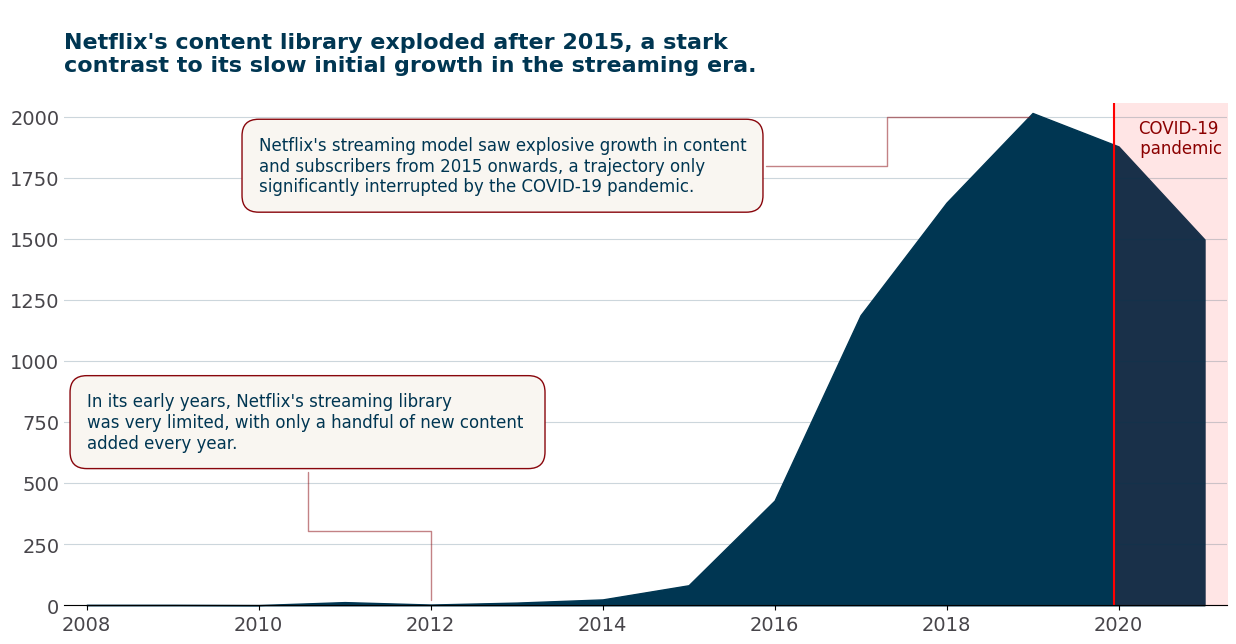

In [6]:
# Content over time plot
monthly_added = netflix_data.date_added.dropna().sort_values().dt.strftime('%Y-%m').value_counts(sort=False)
yearly_added = netflix_data.date_added.dropna().sort_values().dt.year.value_counts(sort=False)

fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(top=0.75)
ax.margins(0.02)
ax.fill_between(yearly_added.index, yearly_added, color='#003652', alpha=1)

ax.spines[['top', 'right',]].set_visible(False)
ax.spines['bottom'].set(position='zero')
ax.spines.left.set_visible(False)
ax.tick_params(axis='y', length=0)

ax.grid(axis='y', color='#003652', alpha=0.2, zorder=0)
ax.tick_params(labelcolor='#47454A', labelsize=14)

ax.set_title(
    '\nNetflix\'s content library exploded after 2015, a stark \n' \
    'contrast to its slow initial growth in the streaming era.\n', 
    loc='left', fontsize=16, color='#003652', fontweight='bold')

bbox = {
    'edgecolor': '#89060C',
    'facecolor': '#F9F6F1',
    'boxstyle': 'round,pad=1',
}
arrow = {
    'arrowstyle': '-',
    'connectionstyle': 'bar,angle=180,fraction=0.5',
    'edgecolor': '#89060C',
    'alpha': 0.5
}

text1 = \
"""In its early years, Netflix's streaming library 
was very limited, with only a handful of new content 
added every year."""
ax.annotate(text1, xy=(2012, 10), xytext=(2008, 750), 
            color='#003652', bbox=bbox, va='center', arrowprops=arrow, 
            fontsize=12);

arrow = {
    'arrowstyle': '-',
    'connectionstyle': 'bar,angle=90,fraction=-0.5',
    'edgecolor': '#89060C',
    'alpha': 0.5,
    'relpos': (1, 0.5)
}

text1 = \
"""Netflix's streaming model saw explosive growth in content
and subscribers from 2015 onwards, a trajectory only 
significantly interrupted by the COVID-19 pandemic."""
ax.annotate(text1, xy=(2019, 2000), xytext=(2010, 1800), 
            color='#003652', bbox=bbox, va='center', arrowprops=arrow, 
            fontsize=12);

ax.axis(ax.axis())
ax.vlines([2019.95], ymin=0, ymax=2200, color='red')
ax.fill_between([2019.95, 2024], [2200, 2200], color='red', alpha=0.1)
ax.text(s='COVID-19\n pandemic', x=2020.7, y=1850, ha='center', fontsize=12, color='darkred');


<div style='font-size:1.1rem; color:#003049'>
<br>
However, <b style='font-weight: bold; color: darkred'>the COVID-19 pandemic in 2020 introduced new challenges</b>. While lockdowns led to an explosion in streaming demand, production shutdowns and theater closures disrupted content pipelines. The industry landscape shifted further as <b style='font-weight: bold; color: darkred'>competitors like Disney+, HBO Max, and Apple TV+ entered the streaming race</b>, intensifying the battle for subscriber retention and exclusive content.
<br>

## <div style='color: #8B0000'> Netflix becomes an international phenomenom</div>

<div style='font-size:1.1rem; color:#003049'>
<br>
In its early stages, Netflix primarily featured US-produced content. A significant strategic shift occurred after 2015, leading to a substantial increase in international productions.  Although the US still contributes the most content, <b style='font-weight: bold; color: darkred'>international titles now account for 68% of the total: more than two-thirds of Netflix's offerings</b>.
<br>

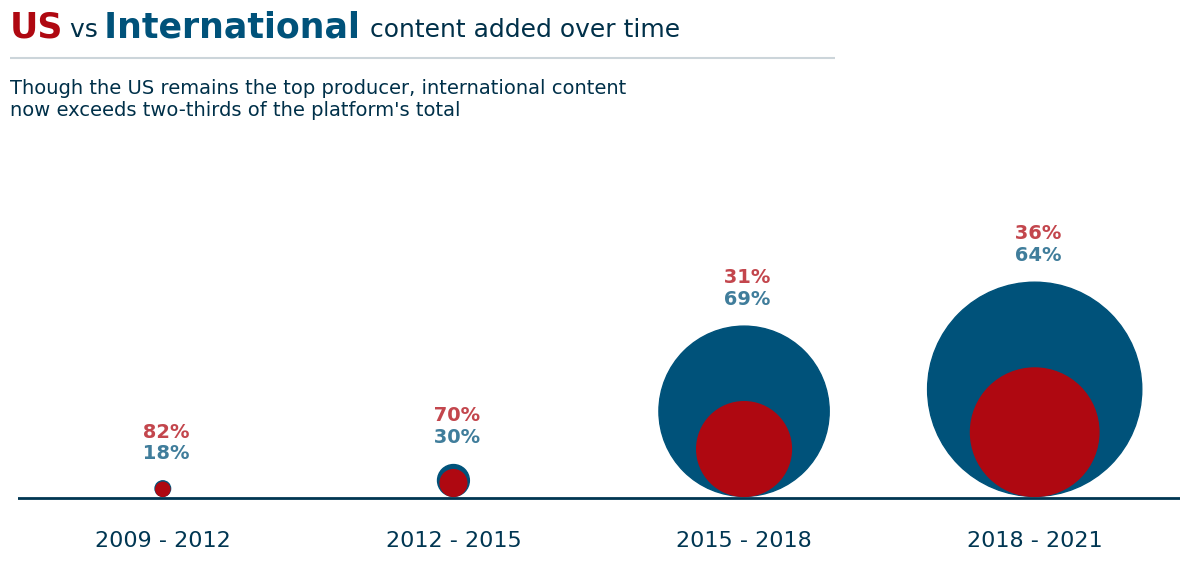

In [7]:
# Content grow: US vs International

total_us = netflix_data[netflix_data.country=='United States of America'].dropna().date_added.dt.year
total_int = netflix_data[netflix_data.country!='United States of America'].dropna().date_added.dt.year
total_us = pd.cut(total_us, bins=(2009, 2012, 2015, 2018, 2021)).value_counts()
total_int = pd.cut(total_int, bins=(2009, 2012, 2015, 2018, 2021)).value_counts()

fig, ax = plt.subplots(1, 4, figsize=(15, 7), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, top=0.75)
axt = fig.add_axes([.12, .73, 0.55, 0.2])
axt.axhline(0.7, color='#003049', alpha=0.2)
axt.text(s='Though the US remains the top producer, international content\n'
           'now exceeds two-thirds of the platform\'s total', 
        x=0, y=0.55, fontsize=14, color='#003049', ha='left', va='top')
axt.axis('off')

fig.text(x=0.12, y=0.9, s='US', fontsize=25, ha='left', fontweight='bold', color='#AF0811')
fig.text(x=0.155, y=0.9, s=' vs ',  fontsize=18, ha='left', fontweight='regular', color='#003049')
fig.text(x=0.175, y=0.9, s=' International', fontsize=25, ha='left', fontweight='bold', color='#00527A')
fig.text(x=0.355, y=0.9, s=' content added over time',  fontsize=18, ha='left', fontweight='regular', color='#003049')

for axi, area_us, area_int, interval in zip(ax[::-1], total_us, total_int, total_us.index):
    radius_tot = 0.13 * np.sqrt(area_us + area_int)
    radius_int = 0.13 * np.sqrt(area_us)
    pct_us = 100 * area_us / (area_us + area_int)
    pct_int = 100 * area_int / (area_us + area_int)
    
    circle = plt.Circle((0, radius_tot), radius_tot, color='#00527A')  
    circle_int = plt.Circle((0, radius_int), radius_int, color='#AF0811')

    axi.annotate(f' {pct_us:.0f}%', color='#AF0811', xy=(0, 2*radius_tot+3), 
                 fontweight='bold', ha='center', fontsize=14, alpha=0.75)
    axi.annotate(f' {pct_int:.0f}%', color='#00527A', xy=(0, 2*radius_tot+1.5),
                 fontweight='bold', ha='center', fontsize=14, alpha=0.75)
    
    axi.add_patch(circle)
    axi.add_patch(circle_int)
    axi.set_aspect('equal')
    axi.set(xlim=(-10, 10), ylim=(-2, 20)) # Ajuste del ylim para que los circulos se vean completos
    axi.set_xlabel(f'{interval.left} - {interval.right}', color='#003652', fontweight='regular', fontsize=16)
    axi.axhline(-0.1,  linewidth=2, color='#003652') # Agregar una linea horizontal en 0 para visualizacion
    axi.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
    axi.set(xticks=[], yticks=[])

plt.show()



<div style='font-size:1.1rem; color:#003049'>
<br>
<b style='font-weight: bold; color: darkred'>Netflix's content is truly global, with productions originating from over 100 countries around the world </b>.The United States leads by a large margin, contributing nearly 3,700 titles to the platform. However, countries like India, the United Kingdom, Canada, and France also make significant contributions, <b style='font-weight: bold; color: darkred'>highlighting Netflix’s diverse and international content strategy </b>. This diversity reflects the platform’s effort to appeal to a wide audience by embracing regional storytelling and local talent.

</div>

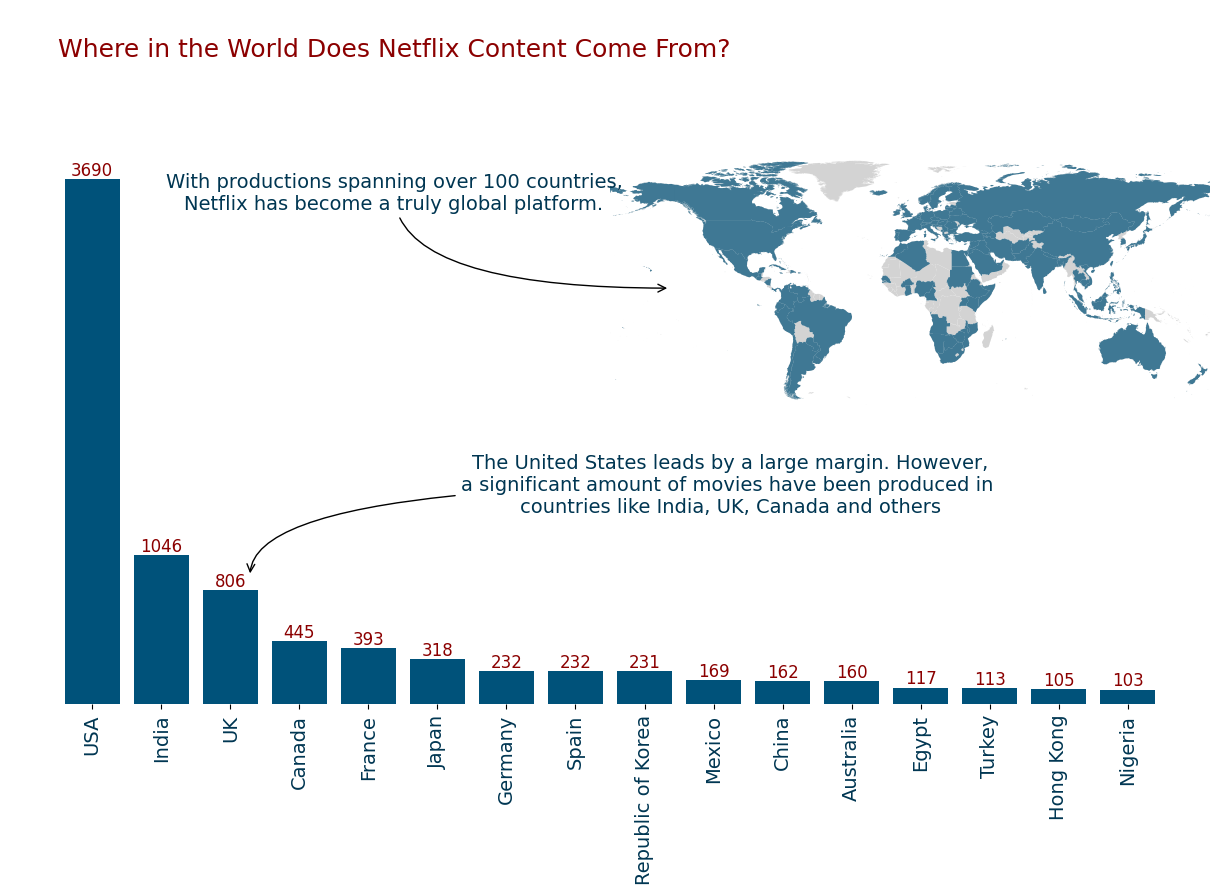

In [8]:

conteo_paises = (
    netflix_data['country'].str.split(', ')
    .explode()
    .str.replace(',', '')
    .str.strip()
    .value_counts()
    .reset_index(drop=False)
)

merged_gdf = gdf_world.merge(
    conteo_paises,
    how='right',
    left_on='name', 
    right_on='country'
)

fig = plt.figure(figsize=(15, 8))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax = fig.add_axes([0.5, 0.4, 0.4, 0.4])

ax2.axis('off');ax.axis('off')

gdf_world.plot(color='lightgray', ax=ax)
merged_gdf[merged_gdf['count']>0].plot(ax=ax, color='#00527A', alpha=0.7)

ax.set_ylim(-90, 90)
ax.set_xlim(-180, 180)


ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.8], facecolor='none')
xlabels = (conteo_paises.loc[:15]['country']
           .str.replace('United States of America', 'USA')
           .str.replace('U.K. of Great Britain and Northern Ireland', 'UK')
          )

bars = ax2.bar(
    xlabels,
    conteo_paises.loc[:15]['count'],
    color='#00527A',
)
ax2.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax2.set_yticks([])
ax2.tick_params(rotation=90, axis='x', labelsize=14, labelcolor='#003652')

ax2.bar_label(bars, color='darkred', fontsize=12)
ax2.set_ylim(0, 4500)

ax2.annotate(
    'With productions spanning over 100 countries,' 
    '\nNetflix has become a truly global platform.',
    xy=(0.55, 0.65),
    xytext=(0.32, 0.8),
    ha='center', va='center',
    xycoords='axes fraction',
    arrowprops={'arrowstyle': '->',
                'connectionstyle': 'angle3,angleA=-90,angleB=0'},
    fontsize=14, color='#003652'
)

ax2.annotate(
    'The United States leads by a large margin. However,\n'
    'a significant amount of movies have been produced in \n'
    'countries like India, UK, Canada and others',
    xytext=(0.6, 0.3),
    xy=(0.2, 0.2),
    xycoords='axes fraction',
    ha='center',
    arrowprops={'arrowstyle': '->',
                'connectionstyle': 'angle3,angleA=-180,angleB=-90'},
    fontsize=14, color='#003652'
    
)

ax2.set_title('\n      Where in the World Does Netflix Content Come From?', loc='left', 
              fontsize=18, color='darkred');


# <div style='color: #8B0000; font-size:2rem'>➡︎  What's Streaming: A Look at Content Types</div>

<div style='font-size:1.1rem; color:#003049'>
Netflix boasts a diverse library catering to a global audience, with a significant portion dedicated to two primary content types: movies and TV shows. As the accompanying visual illustrates, <b style='font-weight: bold; color: darkred'> movies constitute the larger share of individual titles, representing approximately 69.6% of the total catalog (6,131 titles). In contrast, TV shows make up the remaining 30.4% (2676 titles).</b>
<br><br>
However, a closer look reveals a different perspective when considering the sheer volume of content. While movies may be more numerous as individual entries, TV shows often encompass multiple seasons, each containing several episodes. To illustrate this, considering an estimated average of 10 episodes per season and an average episode duration of 25 minutes, the total viewing time offered by TV shows significantly outweighs that of movies. The graphic indicates a total of <b style='font-weight: bold; color: darkred'> 1,417 million minutes of content for TV shows compared to 610,000 minutes for movies </b>.

</div>


## <div style='color: #8B0000'> Where They Shine: Movies or TV?</div>

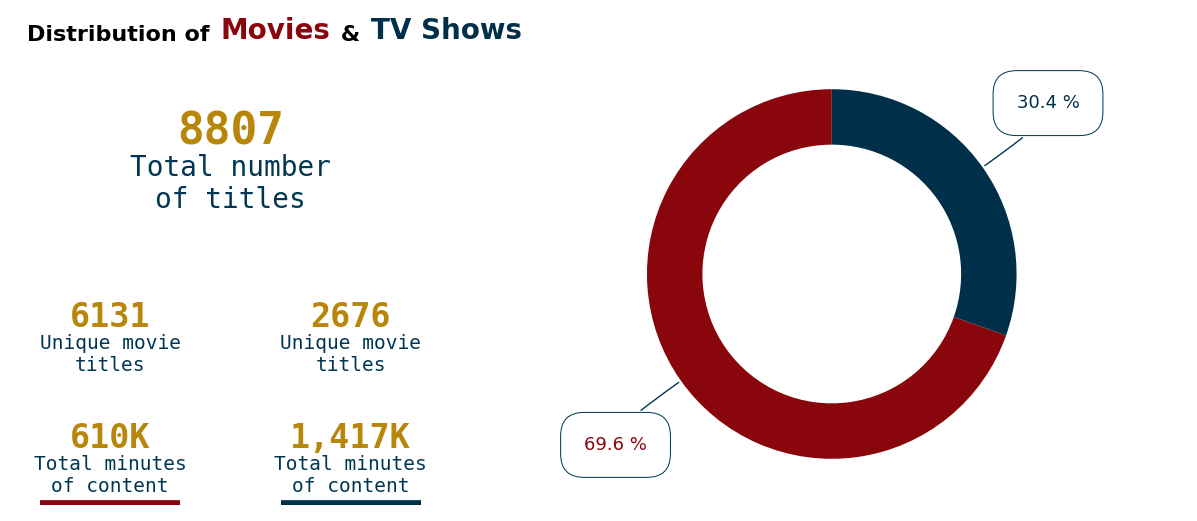

In [9]:

n_titles = len(netflix_data)
n_movies = len(netflix_data[netflix_data.type=='Movie'])
n_tv_shows = len(netflix_data[netflix_data.type=='TV Show'])
min_movies = (
    netflix_data.query('type == "Movie"')
    .duration
    .str.extract('(\d+)')
    .astype(float)
    .sum()
    .values[0]
)
min_tv_shows = 10 * 30 * (
    netflix_data.query('type == "TV Show"')
    .duration
    .str.extract('(\d+)')
    .astype(float)
    .sum()
    .values[0]
)
min_total = min_movies + min_tv_shows

gs = plt.GridSpec(4, 5)

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(gs[:2, :2])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[2, 1])
ax4 = fig.add_subplot(gs[3, 0])
ax5 = fig.add_subplot(gs[3, 1])
ax = fig.add_subplot(gs[:, 2:])

# Plot texts
ax1.annotate(str(n_titles), xy=(0.5, 0.5),
             color='#B9860C',
             fontsize=32,
             fontweight='bold',
             fontfamily='monospace',
             ha='center',
             va='bottom'
)
ax1.annotate("Total number\nof titles",
             xy=(0.5, 0.5),
             color='#003652',
             fontsize=20, 
             fontweight='light', 
             fontfamily='monospace',
             ha='center',
             va='top')


ax2.annotate(str(n_movies),
             xy=(0.5, 0.5),
             color='#B9860C',
             fontweight='bold',
             fontfamily='monospace',
             ha='center',
             va='bottom',
             fontsize=24)
ax2.annotate('Unique movie\ntitles',
             xy=(0.5, 0.5),
             color='#003652',
             fontweight='light', 
             fontfamily='monospace', 
             ha='center', 
             va='top',
             fontsize=14)
ax4.annotate(f'{min_movies/1000:,.0f}K',
             xy=(0.5, 0.5),
             color='#B9860C',
             fontweight='bold',
             fontfamily='monospace',
             ha='center',
             va='bottom',
             fontsize=24)
ax4.annotate('Total minutes\nof content',
             xy=(0.5, 0.5),
             color='#003652',
             fontweight='light', 
             fontfamily='monospace', 
             ha='center', 
             va='top',
             fontsize=14)

ax3.annotate(str(n_tv_shows),
             xy=(0.5, 0.5),
             color='#B9860C',
             fontweight='bold',
             fontfamily='monospace',
             ha='center',
             va='bottom',
             fontsize=24)
ax3.annotate('Unique movie\ntitles',
             xy=(0.5, 0.5),
             color='#003652',
             fontweight='light', 
             fontfamily='monospace', 
             ha='center', 
             va='top',
             fontsize=14)
ax5.annotate(f'{min_tv_shows/1000:,.0f}K',
             xy=(0.5, 0.5),
             color='#B9860C',
             fontweight='bold',
             fontfamily='monospace',
             ha='center',
             va='bottom',
             fontsize=24)
ax5.annotate('Total minutes\nof content',
             xy=(0.5, 0.5),
             color='#003652',
             fontweight='light', 
             fontfamily='monospace', 
             ha='center', 
             va='top',
             fontsize=14)



# Crear el gráfico de pastel
pie_values = netflix_data.type.value_counts()
pcts = pie_values / sum(pie_values)

wedges, _ = ax.pie(
            pie_values,
            colors=['#89060C', '#003049'],
            startangle=90,         # Hace que empiece desde arriba
            wedgeprops={'width': 0.3},  # Controla el grosor del doughnut
            labels=None,           # Si no quieres que aparezcan las etiquetas en el gráfico
            autopct=None,
            pctdistance=0.75,
            textprops={'color': 'white', 'fontsize': 20})

# Asegurarse de que sea un círculo perfecto
ax.set_aspect('equal')


bbox_props = dict(boxstyle="round,pad=1.3", fc="w", lw=0.72, ec='#003652')
kw = dict(arrowprops=dict(arrowstyle="-", color='#003652'),
          bbox=bbox_props, zorder=0, va="center")


colors=['#89060C', '#003049']
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    ha = {-1: "right", 1: "left"}[int(np.sign(x*0.2))]
    connectionstyle = f"angle3,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(f'{100*pcts.iloc[i]:.1f} %', xy=(x, y), xytext=(np.sign(x), 1.6*y),
                ha=ha, fontsize=13, color=colors[i], **kw,)

for ax in [ax1, ax2, ax3, ax4, ax5, ax]:
    ax.axis('off')
    ax.axis(ax.axis())
    
#ax2.hlines(xmin=0, xmax=1, y=0, color='#89060C', lw=8)
ax4.hlines(xmin=0.15, xmax=0.85, y=0, color='#89060C', lw=7)
#ax3.hlines(xmin=0, xmax=1, y=0, color='#003049', lw=8)
ax5.hlines(xmin=0.15, xmax=0.85, y=0, color='#003049', lw=7)
#ax2.set_title('Movies', loc='center', fontsize=14, color='#89060C')
#ax3.set_title('TV Shows', loc='center', fontsize=14, color='#003049');


text1 = TextArea("Distribution of ", textprops=dict(color='black', fontsize=16, weight='bold'))
text2 = TextArea("Movies", textprops=dict(color='#89060C', fontsize=20, weight='bold'))
text3 = TextArea(" & ", textprops=dict(color='black', fontsize=16, weight='bold'))
text4 = TextArea("TV Shows", textprops=dict(color='#003049', fontsize=20, weight='bold'))

# Combinar horizontalmente
title_box = HPacker(children=[text1, text2, text3, text4], align="left", pad=0, sep=2)

# Anclar arriba del eje
anchored_title = AnchoredOffsetbox(loc='upper center', child=title_box, pad=0.5,
                                   frameon=False, bbox_to_anchor=(0.6, 1.15),
                                   bbox_transform=ax1.transAxes, borderpad=0.0)

axt = fig.add_axes([0.9, 0.1, 0.01, 0.8])
axt.axis('off')
fig.add_artist(anchored_title);

<div style='font-size:1.1rem; color:#003049'>
Therefore, the 'length' comparison between movies and TV shows depends heavily on the metric used – the number of unique titles or the total viewing duration. Both perspectives offer valuable insights into the vastness and composition of Netflix's streaming content. <b style='font-weight: bold; color: darkred'>Regardless of how you measure it, one thing is certain: Netflix offers a substantial amount of content for viewers to explore.</b>
</div>

## <div style='color: #8B0000'> Who is content really for?</div>

<div style='font-size:1.1rem; color:#003049'>
When we think of Netflix, we often think of entertainment for everyone — but who is most of that content really for? 📊

Based on the visual data, we can see a clear trend: 
<b style='font-weight: bold; color: darkred'>nearly half of Netflix’s catalog is rated for Adults (46.0%)</b>. 
Teens come next with 
<b style='font-weight: bold; color: darkred'>30.4% of the content</b>, 
while content specifically made for younger children accounts for just 
<b style='font-weight: bold; color: darkred'>23.6%</b>.

The donut chart offers a quick overview of this age distribution, while the bar chart breaks it down further — from kid-friendly ratings like TV-Y and G, to teen-targeted categories like PG-13 and TV-14, and finally adult-oriented content like R and 
<b style='font-weight: bold; color: darkred'>TV-MA, which dominates the chart</b>.

<b style='font-weight: bold; color: darkred'>The takeaway? Netflix heavily caters to older audiences, especially adults and teenagers.</b> 

🎯 Whether you're a parent, educator, content creator, or just curious about media trends, this snapshot sheds light on how content platforms are shaping their libraries — and who they're shaping them for.
</div>


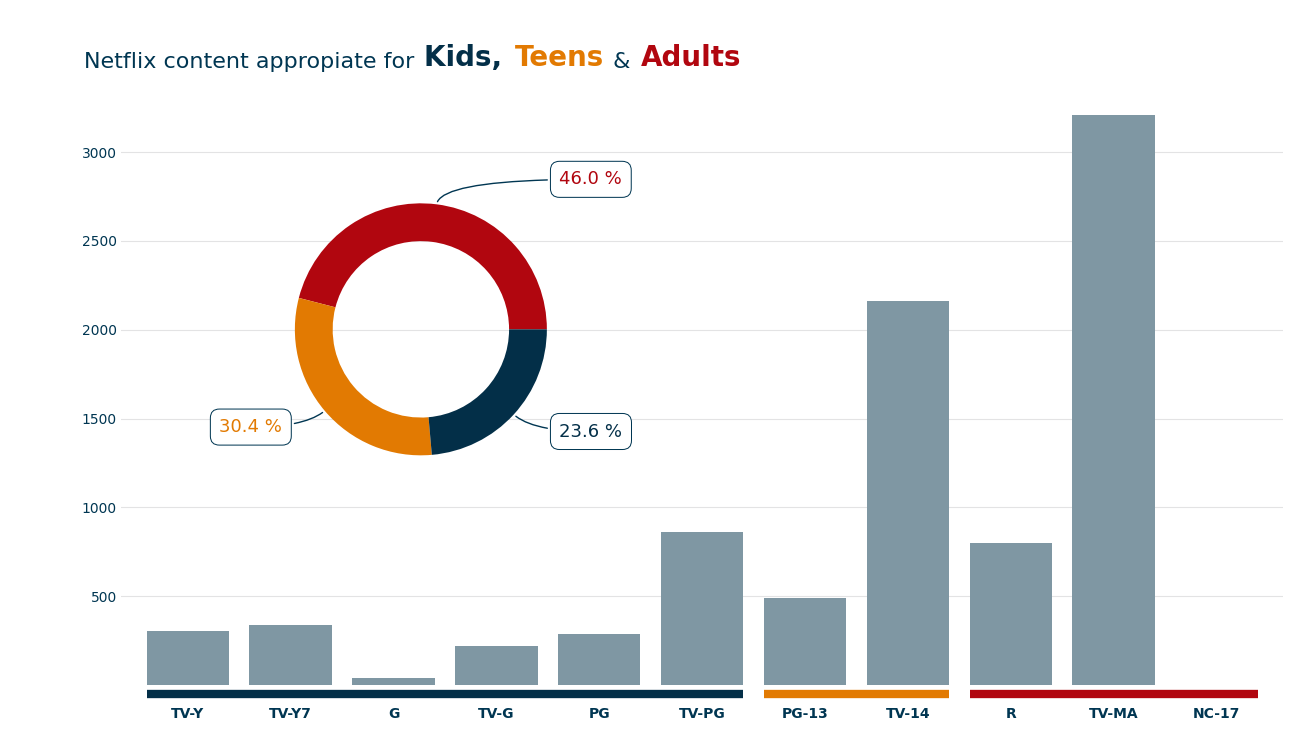

In [10]:

colors = ['#B1060F', '#E27A02', '#032F48']

fig, ax = plt.subplots(figsize=(15, 9))

netflix_data.query('rating != "NR"').rating.value_counts().sort_index().plot(
    kind='bar',
    color='#7F97A3',
    width=0.8,
    ax=ax,
    zorder=6
)

ax.tick_params(
    axis='both',
    rotation=0, 
    direction='in',
    bottom=False,
    left=False,
    pad=3, 
    labelcolor='#003652'
)
ax.set_xticklabels(ax.get_xticklabels(), weight='bold', zorder=15)
ax.set_yticks(ax.get_yticks()[1:-1])
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax.set_xlabel('')
ax.grid(color='#47454A', alpha=0.15, axis='y', zorder=0)
ax.set_ylim(-100, 3800)
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[-1] - 1)


ax.hlines(xmin=-0.4, xmax=5.4, y=-50, lw=6, color=colors[2])
ax.hlines(xmin=5.6, xmax=7.4, y=-50, lw=6, color=colors[1])
ax.hlines(xmin=7.6, xmax=10.4, y=-50, lw=6, color=colors[0])


s="""Netflix offers a diverse library of content, with a strong focus
on mature audiences (TV-MA). This suggests a significant portion of 
Netflix's user base is composed of adults."""



# Plot doughnut chart
ax = fig.add_axes([0.15, 0.35, 0.35, 0.35])
ax.set_aspect('equal')

pie_data = netflix_data.query('rating_classes != "N"')['rating_classes'].value_counts()
pcts = pie_data / pie_data.sum()
wedges, *_ = ax.pie(
    pie_data,
    colors=colors,
    radius=1,
    wedgeprops={'width': 0.3}
)


bbox_props = dict(boxstyle="round,pad=0.5", fc="w", lw=0.72, ec='#003652')
kw = dict(arrowprops=dict(arrowstyle="-", color='#003652'),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    ha = {-1: "right", 1: "left"}[int(np.sign(x*0.2))]
    connectionstyle = f"angle3,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(f'{100*pcts.iloc[i]:.1f} %', xy=(x, y), xytext=(1.1*np.sign(x), 1.2*y),
                ha=ha, fontsize=13, color=p.get_facecolor(), **kw,)


# Titlte of tha visualization
#fig.text(s='Netflix content appropiate for ', x=0.5, y=0.92, fontsize=15, ha='center', color='#003652');
text0 = TextArea('Netflix content appropiate for ', 
                 textprops=dict(color='#003652', fontsize=16, fontweight='medium'))
text1 = TextArea("Kids, ", textprops=dict(color=colors[2], fontsize=20, weight='bold'))
text2 = TextArea("Teens", textprops=dict(color=colors[1], fontsize=20, weight='bold'))
text3 = TextArea(" & ", textprops=dict(color='#003652', fontsize=16, weight='medium'))
text4 = TextArea("Adults", textprops=dict(color=colors[0], fontsize=20, weight='bold'))

# Combinar horizontalmente
title_box = HPacker(children=[text0, text1, text2, text3, text4], align="left", pad=0, sep=2)

# Anclar arriba del eje
anchored_title = AnchoredOffsetbox(loc='upper center', child=title_box, pad=0.5,
                                   frameon=False, bbox_to_anchor=(0.51, 1.75),
                                   bbox_transform=ax1.transAxes, borderpad=0.0)
fig.add_artist(anchored_title);

## <div style='color: #8B0000'> Something for Everyone: Netflix’s Wide-Ranging Library </div>

<div style='font-size:1.1rem; color:#003049'>
    But Netflix isn't just about <b>who</b> likes what's on, it's also about <b>what</b> there is to watch. When we check out the different kinds of movies and shows and who they're meant for, something really stands out: <b style='font-weight: bold; color: darkred'>Netflix has tons of stuff to watch, no matter how old you are or what you're in the mood for.</b>
    <br><br>
    <b style='font-weight: bold; color: darkred'>You see a lot of movies and shows in categories like International, Dramas, and Comedies – there are thousands of them!</b> Just the "International" section alone has more than 4,000 things to watch.
    <br><br>
    The chart we have here really shows how different types of Netflix content are for different age groups. Some things, like Stand-Up Comedy, Sci-Fi & Fantasy, and Horror, are almost always for older people. But other categories, like Music & Musicals or Docuseries, have a good mix for everyone.
    <br><br>
    If you're a family, a teacher, or someone who makes movies and shows, this helps you see where there are already great things for kids and where there could be even more.
</div>

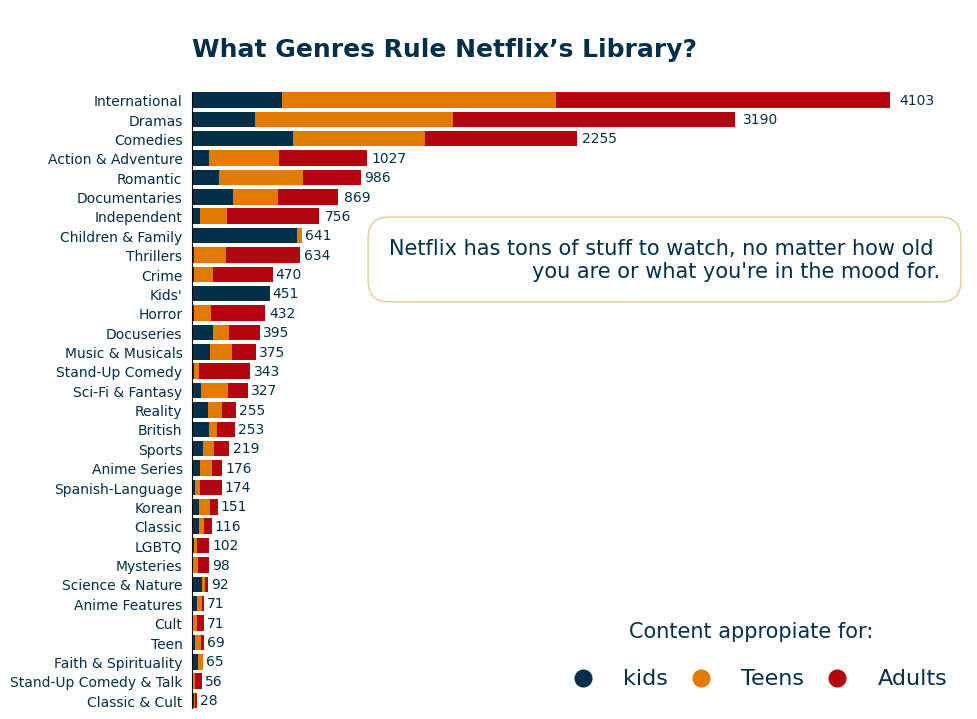

In [11]:
all_category_lists = (
    netflix_data.listed_in
    .str.replace('Movies', '')
    .str.replace('TV', '')
    .str.replace('Shows', '')
    .str.split(', ')
    .apply(lambda list_i: [li.strip() for li in list_i])
    .apply(lambda list_i: [li if li else None for li in list_i])
    .dropna()
)


f_category = (
    all_category_lists
    .explode()
    .value_counts()
)
f_category_kids = (
    all_category_lists[netflix_data.rating_classes=='Kids']
    .explode()
    .value_counts()
)
f_category_teens = (
    all_category_lists[netflix_data.rating_classes=='Teens']
    .explode()
    .value_counts()
)
f_category_adults = (
    all_category_lists[netflix_data.rating_classes=='Adults']
    .explode()
    .value_counts()
)

fig, ax = plt.subplots(figsize=(10, 8))
ax.margins(0)
bars = ax.barh(f_category.index, f_category.values, alpha=0)

for yi, cat in zip(ax.get_yticks(), ax.get_yticklabels()):
    cat = cat.get_text()
    f_cat_kids = f_category_kids[cat] if cat in f_category_kids else 0
    f_cat_teens = f_category_teens[cat] if cat in f_category_teens else 0
    f_cat_adults = f_category_adults[cat] if cat in f_category_adults else 0

    ax.barh([cat], [f_cat_kids], color='#032F48')
    ax.barh([cat], [f_cat_teens], color='#E27A02', left=f_cat_kids)
    ax.barh([cat], [f_cat_adults], color='#B1060F', left=f_cat_kids + f_cat_teens)

ax.set_xlim(0, ax.get_xlim()[1]*1.1)
labels = ax.bar_label(bars, padding=2, color='#032F48')

ax.tick_params(left=False, bottom=False, labelcolor='#032F48', color='#032F48')
ax.spines[['bottom', 'right', 'top']].set_visible(False)
ax.set_xticks([])
ax.set_ylim(reversed(ax.get_ylim()))

s1 = ax.scatter([], [], color='#032F48', label='kids')
s2 = ax.scatter([], [], color='#E27A02', label='Teens')
s3 = ax.scatter([], [], color='#B1060F', label='Adults')
legend = ax.legend(loc='lower right', handles=[s1,s2,s3], 
          ncol=3, fontsize=16, labelcolor='#032F48', 
          labelspacing=1.2, markerscale=2, title='Content appropiate for: ', 
          columnspacing=0.5, frameon=False)

plt.setp(legend.get_title(), color='#032F48', fontsize=15)

ax.set_title('\nWhat Genres Rule Netflix’s Library?\n', loc='left', 
            fontweight='bold',
             ha='left',
             fontsize=18, color='#032F48')

ax.annotate("""Netflix has tons of stuff to watch, no matter how old 
you are or what you're in the mood for.""", xy=(0.965, 0.7), ha='right', color='#032F48',
           fontweight='medium', xycoords='axes fraction', fontsize=15, 
           bbox={'boxstyle': 'round,pad=1', 'facecolor':'none', 'edgecolor': '#E1CC99'});

## <div style='color: #8B0000'> Perfect Pairings: How Netflix Mixes Genres to Match Your Mood </div>


<div style="font-size:1.1rem; color:#003049">
    Ever have that moment where you want a funny movie, but your friend wants something serious? Or maybe you love a good love story but also want to watch a fun show with your kid? Guess what? There are mixes for everyone! By looking closely at how different kinds of movies and shows on Netflix go together – it's like a <b style='font-weight: bold; color: darkred'>map of genre pairings</b> – we can see some clear trends in how Netflix puts things together to give us the best watching experience:
    <div style='height:1rem'></div>
    🔥 <b>“Dramas” are the real team players here</b>. They pop up a lot with International movies and shows (almost 2,000 times!), Documentaries (over 600 times), Crime stories (almost 200 times), and even Comedies (also over 600 times). It looks like drama is a key part of many great stories on Netflix.
    <div style='height:1rem'></div>
    🌍 <b>You can find “International” stuff everywhere</b>. The fact that it's often paired with Dramas, Documentaries, and even Horror suggests that people all over the world want to see stories that are rich, different, and show us other cultures.
    <div style='height:1rem'></div>
    😂🎵 “Comedies” are more versatile than you might think! They often show up with Documentaries (almost 300 times), Music & Musicals (around 90 times), and Romance (almost 400 times) – proving that laughter fits in with lots of different kinds of stories.
    <div style='height:1rem'></div>
    👶👨‍👩‍👧 “Children & Family” content goes hand-in-hand with Kids' stuff, Musicals, and Documentaries – which makes sense since Netflix wants to have both fun and educational things for families.
    <div style='height:1rem'></div>
    🔍 “Thrillers” really stand out because they're often paired with Documentaries (almost 300 times) and Horror (around 140 times), showing that lots of people love those suspenseful and intense stories.
    <div style='height:1rem'></div>
    🎤 Surprisingly, <b style='font-weight: bold; color: darkred'>Stand-Up Comedy usually sticks to itself</b>. It doesn't mix with other kinds of shows very often, which means it's a pretty specific thing that people look for.
    <div style='height:1rem'></div>
    📌 <b>So, why is this interesting?</b> Because the different kinds of movies and shows don't just exist on their own. Netflix puts them together in ways that they think we'll like. These patterns are super helpful for the people who make the content, the people who market it, and even the data experts. It helps them understand what we enjoy and how to create and organize things even better.
</div>


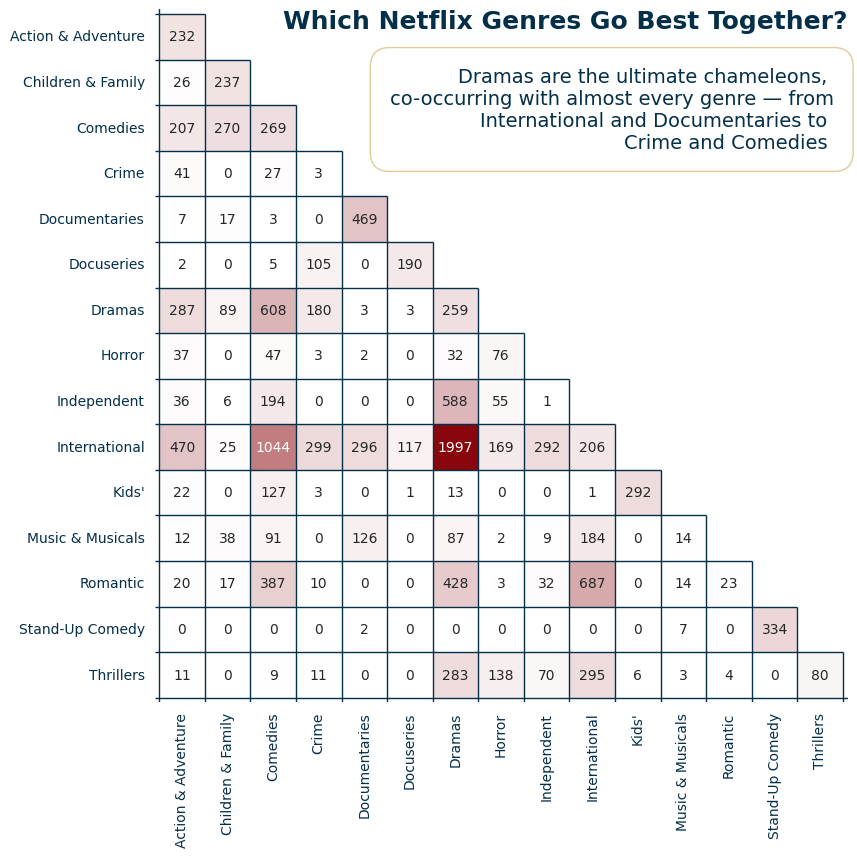

In [12]:
import pandas as pd
from itertools import combinations
from collections import Counter
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

all_category_lists = (
    netflix_data['listed_in']
    .str.replace('TV', '')
    .str.replace('Shows', '')
    .str.replace('Movies', '')
    .dropna().str.split(', ')
    .apply(lambda l: [li.strip() if li.strip() else 'Movies' for li in l])
)

N = 15
top_n = (all_category_lists.explode().value_counts()).index[:N]

category_lists = (
    all_category_lists.apply(lambda l: [li for li in l if li in top_n])
    .apply(lambda li: li if len(li) else None)
    .dropna()
)


# Contador para combinaciones
combo_counts = Counter()

for cats in category_lists:
    # Si hay más de una categoría, contar todas las combinaciones únicas
    if len(cats) > 1:
        for combo in combinations(sorted(set(cats)), 2):  # sin repetidos, ordenados
            combo_counts[combo] += 1
    else:
        # Si hay una sola categoría, contarla como diagonal
        combo = (cats[0], cats[0])
        combo_counts[combo] += 1

# Obtener todas las categorías únicas
all_categories = sorted(set([cat for cats in category_lists for cat in cats]))

# Crear la matriz vacía
co_occurrence_matrix = pd.DataFrame(0, index=all_categories, columns=all_categories)

# Rellenar la matriz
for (cat1, cat2), count in combo_counts.items():
    co_occurrence_matrix.loc[cat1, cat2] += count
    if cat1 != cat2:
        co_occurrence_matrix.loc[cat2, cat1] += count  # simétrica

# Ordenar si deseas
co_occurrence_matrix = co_occurrence_matrix.sort_index().sort_index(axis=1)



mat = co_occurrence_matrix.iloc[:20 ,:20]
cmap = LinearSegmentedColormap.from_list('netf', ['#fff', '#89060C'])
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(
    mat,
    cmap=cmap,
    vmin=0, vmax=mat.values.max(),
    square=True,
    cbar=False,
    annot=True,
    fmt='.0f',
    ax=ax,
    mask=np.triu(np.ones_like(mat)) - np.diag([1]*len(mat)),
)

ax.set_ylim(ax.get_ylim()[0]+0.1, ax.get_ylim()[1]-0.1)
ax.set_xlim(ax.get_xlim()[0]-0.1, ax.get_xlim()[1]+0.1)
for i in range(len(mat) + 2):
    ax.hlines(i-1, xmin=ax.get_xlim()[0], xmax=i, lw=1, color='#032F48')
    ax.vlines(i-1, ymin=ax.get_ylim()[0], ymax=i-2, lw=1, color='#032F48')

ax.tick_params(left=False, bottom=False, labelcolor='#032F48', color='#032F48')

ax.annotate('Which Netflix Genres Go Best Together?', fontsize=18, fontweight='bold', 
            color='#032F48', xy=(1, 1), ha='right', va='top', xycoords='axes fraction')

ax.annotate("""Dramas are the ultimate chameleons, 
co-occurring with almost every genre — from
International and Documentaries to 
Crime and Comedies """, xy=(0.98, 0.8), ha='right', color='#032F48',
           fontweight='medium', xycoords='axes fraction', fontsize=14, 
           bbox={'boxstyle': 'round,pad=1', 'facecolor':'none', 'edgecolor': '#E1CC99'});

## <div style='color: #8B0000'> Who Runs the Show? Netflix’s Top Producers and Stars</div>


<div style='font-size:1.1rem; color:#003049'>
    Ever wonder who's behind all those shows and movies you love on Netflix? This chart pulls back the curtain to reveal the top masterminds: the producers with the most projects under their belt! It turns out, <b style='font-weight: bold; color: darkred'>Rajiv Chilaka is leading the pack</b>, having brought a whopping 22 projects to life on the platform.
    <br><br>
    But the story doesn't end there. Right behind him, we see the driving force of Jan Suter with 21 projects and Raúl Campos with 19. What's really interesting is that <b style='font-weight: bold; color: darkred'>Suter and Campos have been key in creating content for emerging markets, especially in Latin America</b>. This shows how Netflix is focusing on making shows and movies that speak to different cultures and audiences around the world.
    <br><br>
    Looking further down the list, we see other influential producers like Suhas Kadav, Marcus Raboy, and Jay Karas, all with a significant number of projects. It's fascinating to see the individuals who are shaping the content we binge-watch. Even the legendary Martin Scorsese makes an appearance with 12 projects, highlighting how top-tier talent is drawn to the platform.
    <br><br>
    Ultimately, this glimpse behind the scenes celebrates the creative powerhouses who work tirelessly to bring diverse stories and entertainment to our screens. These producers aren't just making content; they're crafting the Netflix experience we all know and enjoy.
</div>

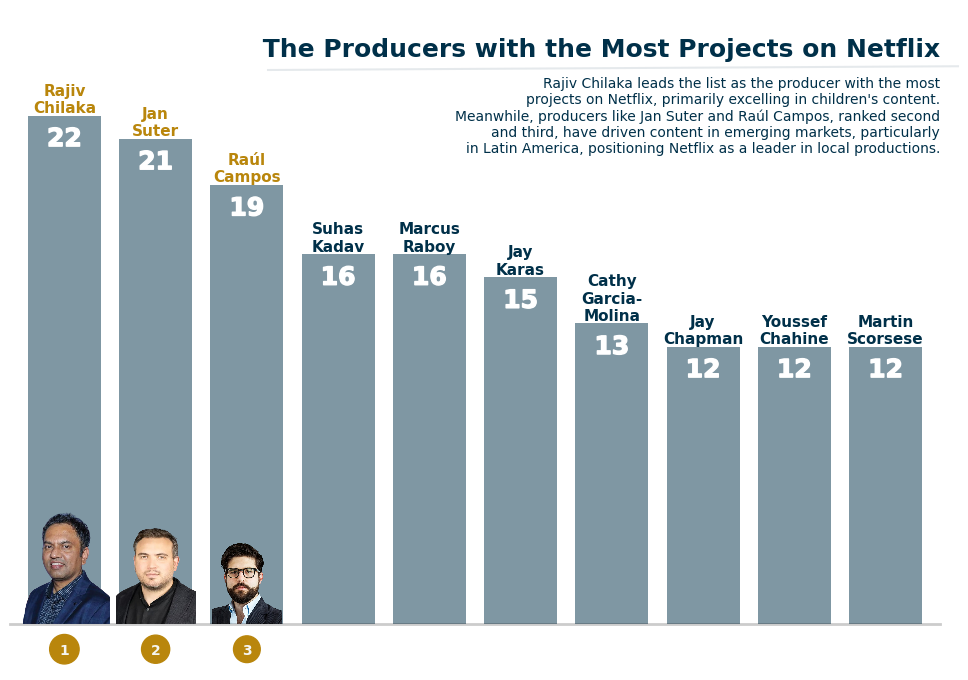

In [13]:
directors = []
for director in netflix_data.director:
    if isinstance(director, str):
        directors.extend(director.split(','))
directors = [director.strip() for director in directors]

top_director = (
    pd.Series(directors)
    .value_counts()
    .head(10)
)
#top_director['...'] = 5
top_director.sort_values(ascending=False, inplace=True)
top_3 = top_director.index[:3]
 
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.margins(0.02)
ax.spines[['left', 'right', 'top']].set_visible(False)
ax.spines['bottom'].set(position='zero', lw=2, zorder=10, alpha=0.2)
ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])
bars = ax.bar(top_director.index, top_director, zorder=5, color='#003049', lw=0.5, alpha=0.5)

# Add images
img1 = OffsetImage(plt.imread('/kaggle/input/netflix-img/rajiv_chilaka.png'), zoom=0.18)
img1_bbox = AnnotationBbox(img1, (0, 0), frameon=False, box_alignment=(0.5, 0), zorder=30)
ax.add_artist(img1_bbox)
img2 = OffsetImage(plt.imread('/kaggle/input/netflix-img/Jan_suter.png'), zoom=0.16)
img2_bbox = AnnotationBbox(img2, (1, 0), frameon=False, box_alignment=(0.5, 0), zorder=20)
ax.add_artist(img2_bbox)
img3 = OffsetImage(plt.imread('/kaggle/input/netflix-img/raul_campos.png'), zoom=0.14)
img3_bbox = AnnotationBbox(img3, (2, 0), frameon=False, box_alignment=(0.5, 0), zorder=10)
ax.add_artist(img3_bbox)

# Add and format labels
for bar, label in zip(bars, top_director.index):
    text_label = label.replace(' ', '\n').replace('-', '-\n') if label != '...' else '•••'
    color = '#B9860C' if label in top_director.index[:3] else '#003049'
    ax.annotate(
        text_label,
        xy = (bar.get_x() + bar.get_width()/2, bar.get_height()),
        ha='center', va='bottom',
        color=color,
        fontsize=11 if label!='...' else 15,
        fontweight='600'
    )
    t=ax.annotate(
        bar.get_height() if label!='...' else '',
        xy= (bar.get_x() + bar.get_width()/2, bar.get_height()-0.5),
        ha='center', va='top',
        fontsize=18,
        color='#FFFFFF',
        fontweight='bold',
        alpha=1,
        path_effects=[patheffects.withStroke(linewidth=1, foreground='white')],
        zorder=50
    )


#bars[-1].remove()

# Add red circles
ax.scatter(
    ['Rajiv Chilaka', 'Jan Suter', 'Raúl Campos'],
    [-1.1, -1.1, -1.1], 
    marker='o',
    s=[450, 410, 370],
    color='#B9860C'
)

ax.set_ylim(-2, 23)
for i, label in enumerate(top_3):
    ax.annotate(i+1, xy=(label, -1.15), color='#F5F5F1', ha='center', va='center', 
                fontweight='bold')

ax.set_title('\n The Producers with the Most Projects on Netflix\n', loc='right', fontsize=18, color='#003049', fontweight='bold');
fig.text(
s="""Rajiv Chilaka leads the list as the producer with the most
projects on Netflix, primarily excelling in children's content.
Meanwhile, producers like Jan Suter and Raúl Campos, ranked second
and third, have driven content in emerging markets, particularly
in Latin America, positioning Netflix as a leader in local productions.""", x=0.9, y=0.8, ha='right', color='#003049')

line = plt.Line2D([0.34, 0.915], [0.91, 0.915], color='#003049', alpha=0.1)
fig.add_artist(line);

<div style='font-size:1.1rem; color:#003049'>
    Ever wondered which stars you see the most when you're binging your favorite Netflix shows and movies? Well, this chart spills the beans on <b style='font-weight: bold; color: darkred'>Netflix's most-featured stars</b>! Leading the pack is the incredibly talented Anupam Kher, who has graced our screens a whopping 43 times.
    <br><br>
    Following closely are the iconic Shah Rukh Khan with 35 appearances and the captivating Julie Tejwani with 33. What's really cool is that this list shows how <b style='font-weight: bold; color: darkred'>Netflix brings together talent from all over the world</b>. You've got Bollywood legends like Amitabh Bachchan and Boman Irani alongside acclaimed actors like Naseeruddin Shah and even Japanese voice actors like Takahiro Sakurai.
    <br><br>
    It's fascinating to see how these familiar faces pop up in different kinds of stories, making them almost like old friends on the platform. This chart isn't just a list of names; it's a peek into <b style='font-weight: bold; color: darkred'>Netflix's global and diverse approach to casting</b>, bringing a rich tapestry of talent to entertain viewers everywhere.
</div>

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 138GB/s]


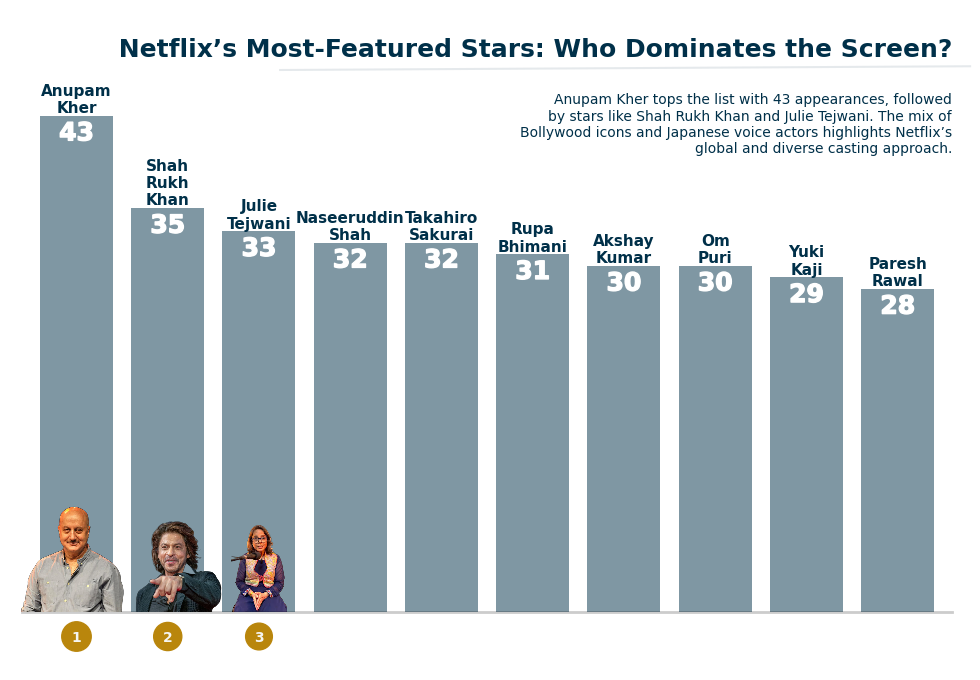

In [14]:
top_cast = (
    netflix_data.cast
    .dropna()
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
)

top_3 = top_cast.index[:3]
 
fig, ax = plt.subplots(figsize=(12, 7.5))
ax.margins(0.02)
ax.spines[['left', 'right', 'top']].set_visible(False)
ax.spines['bottom'].set(position='zero', lw=2, zorder=10, alpha=0.2)
ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])
bars = ax.bar(top_cast.index, top_cast, zorder=5, color='#003049', lw=0.5, alpha=0.5)

# Add images
img1 = plt.imread(fetch_image(
    'https://upload.wikimedia.org/wikipedia/commons/1/16/AnupamKher5.jpg'))
img2 = plt.imread(fetch_image(
    'https://variety.com/wp-content/uploads/2024/08/Shah-Rukh-Khan-Locarno1.jpg'))
img3 = plt.imread(fetch_image(
    'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3swHTcZ9VETq4qgCd_8eiDE3AyU3EsGWW5g&s'
))

img1 = OffsetImage(img1, zoom=0.15)
img1_bbox = AnnotationBbox(img1, (0, 0), frameon=False, box_alignment=(0.5, 0), zorder=30)
ax.add_artist(img1_bbox)
img2 = OffsetImage(img2, zoom=0.10)
img2_bbox = AnnotationBbox(img2, (1, 0), frameon=False, box_alignment=(0.5, 0), zorder=20)
ax.add_artist(img2_bbox)
img3 = OffsetImage(img3, zoom=0.24)
img3_bbox = AnnotationBbox(img3, (2, 0), frameon=False, box_alignment=(0.5, 0), zorder=10)
ax.add_artist(img3_bbox)

# Add and format labels
for bar, label in zip(bars, top_cast.index):
    text_label = label.replace(' ', '\n').replace('-', '-\n') if label != '...' else '•••'
    color = '#B9860C' if label in top_director.index[:3] else '#003049'
    ax.annotate(
        text_label,
        xy = (bar.get_x() + bar.get_width()/2, bar.get_height()),
        ha='center', va='bottom',
        color=color,
        fontsize=11 if label!='...' else 15,
        fontweight='600'
    )
    t=ax.annotate(
        bar.get_height() if label!='...' else '',
        xy= (bar.get_x() + bar.get_width()/2, bar.get_height()-0.5),
        ha='center', va='top',
        fontsize=18,
        color='#FFFFFF',
        fontweight='bold',
        alpha=1,
        path_effects=[patheffects.withStroke(linewidth=1, foreground='white')],
        zorder=50
    )


#bars[-1].remove()

# Add red circles
ax.scatter(
    top_3,
    [-2.1, -2.1, -2.1], 
    marker='o',
    s=[450, 410, 370],
    color='#B9860C'
)

ax.set_ylim(-5, 45)
for i, label in enumerate(top_3):
    ax.annotate(i+1, xy=(label, -2.15), color='#F5F5F1', ha='center', va='center', 
                fontweight='bold')

ax.set_title('\n Netflix’s Most-Featured Stars: Who Dominates the Screen?\n', loc='right', fontsize=18, color='#003049', fontweight='bold');
fig.text(
s="""Anupam Kher tops the list with 43 appearances, followed
by stars like Shah Rukh Khan and Julie Tejwani. The mix of
Bollywood icons and Japanese voice actors highlights Netflix’s
global and diverse casting approach.""",
x=0.9, y=0.8, ha='right', color='#003049')

line = plt.Line2D([0.34, 0.915], [0.91, 0.915], color='#003049', alpha=0.1)
fig.add_artist(line);

<div style='font-size:1.1rem; color:#003049'>
However, actors don’t appear alone in productions. So, <b style='font-weight: bold; color: darkred'>who works solo and who often teams up with others?</b> What are the most common combinations, and which actors enjoy working with a wide range of co-stars — while others tend to stick with just a few?
<br><br>
The arc diagram below reveals exactly that — the behind-the-scenes chemistry between actors who appear together again and again. Each curved line shows a shared appearance, and the thicker and redder the arc, the more often those two actors have worked together.
<br><br>
Some pairings only appear together once in a while. Others? They seem almost inseparable. <b style='font-weight: bold; color: darkred'>Julie Tejwani and Rupa Bhimani, for example, show up together more than any other duo</b> — a powerful pair possibly connected through voice work or recurring roles. But they’re not the only close collaborators. Julie Tejwani also frequently works with Rajesh Kava and Jigna Bhardwaj. <b style='font-weight: bold; color: darkred'>Meanwhile, Anupam Kher has worked with a broader range of co-stars, showing more diversity in collaborations</b>. On the other hand, actors like Samuel L. Jackson, John Cleese, and Fred Tatasciore tend to perform with others who don’t appear in the top-20 most common pairings.
<br><br>
This visualization uncovers not just frequent collaborations, but also the hidden networks that shape how Netflix casts its shows and movies.
</div>

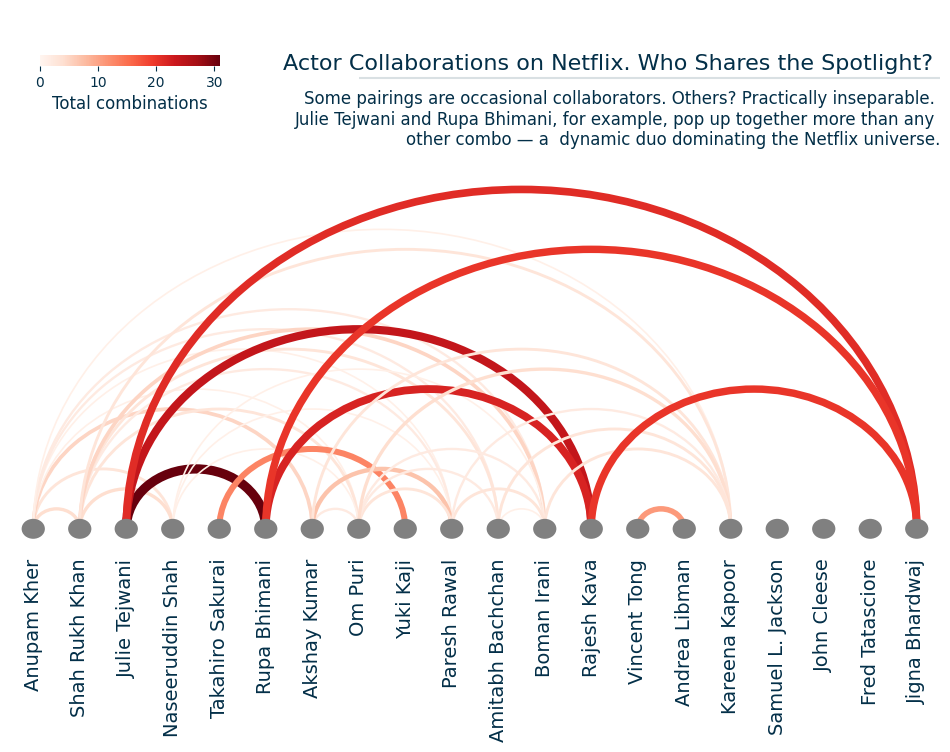

In [15]:
top20_cast = (
    netflix_data.cast
    .dropna()
    .str.split(', ')
    .explode()
    .value_counts()
    .head(20)
    .index
    .to_list()
)

# --- Calculate pair counting ---- 
cast_lists = (
    netflix_data.cast
    .dropna()
    .str.split(', ')
    .apply(lambda list_i: [li.strip() for li in list_i])
)

cast_lists_top = cast_lists[cast_lists.apply(lambda list_i: any([li in top20_cast for li in list_i]))]

mat_counter = np.zeros((len(top20_cast), len(top20_cast)))


for i, j in combinations(range(len(top20_cast)), 2):
    cast_i, cast_j = top20_cast[i], top20_cast[j]

    for cast_list in cast_lists:
        if (cast_i in cast_list) and (cast_j in cast_list):
            mat_counter[i, j] += 1



fig, ax = plt.subplots(figsize=(12, 7))

for i, cast_i in enumerate(top20_cast):
    circle = plt.Circle((i, 0), radius=0.25, facecolor='gray', zorder=10)
    ax.add_patch(circle)


#--- Draw Arc Diagram ---

# Normalización y colormap
norm = Normalize(vmin=mat_counter.min(), vmax=mat_counter.max())
cmap = plt.cm.Reds
sm = ScalarMappable(norm=norm, cmap=cmap)

for i, j in combinations(range(len(top20_cast)), 2):
    value_arcle = max(mat_counter[i, j], mat_counter[j, i])
    lw_arcle = 1.2* np.sqrt(value_arcle)
    color = cmap(norm(value_arcle))
    if lw_arcle > 0:
        arc = Arc(
            xy = ((i + j) / 2, 0),
            width=abs(i - j),
            height=abs(i - j),
            angle=0,
            theta1=0, 
            theta2=180, 
            linewidth=lw_arcle,
            zorder=0,
            color=color
        )
        ax.add_patch(arc)

ax.spines.bottom.set_visible(False)
ax.set_xticks(range(20), top20_cast);
ax.tick_params(bottom=False, left=False, rotation=90, labelcolor='#032F48', labelsize=14)
ax.spines[['left', 'top', 'right']].set_visible(False)
ax.set_yticks([])

#ax.axis('equal')
ax.set_xlim(-0.5, 19.5)
ax.set_ylim(-0.5, 13)

# Draw the Colorbar
cax = fig.add_axes([0.15, 0.8, 0.15, 0.015])
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal', pad=0.02)
cbar.set_label('Total combinations', fontsize=12, color='#032F48')
cax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
cax.tick_params(labelcolor='#032F48', color='#032F48')

for spine in cbar.ax.spines.values():
    spine.set_visible(False)


# --- Title and Texts ------
ax.annotate(
    text='Actor Collaborations on Netflix. Who Shares the Spotlight? ', 
    ha='right',
    xy=(19.5, 11.5),
    fontsize=16,
    color='#032F48',
    fontweight='medium'
)
ax.hlines(y=[11.3], xmin=7, xmax=19.5, color='#032F48', alpha=0.15)
ax.text(
    s=\
"""Some pairings are occasional collaborators. Others? Practically inseparable. 
Julie Tejwani and Rupa Bhimani, for example, pop up together more than any 
other combo — a  dynamic duo dominating the Netflix universe.
""",
    x=19.5,
    y=11,
    va='top', 
    ha='right', 
    color='#032F48',
    fontsize=12
);

<div style='font-size:1.1rem; color:#003049'>
By diving into Netflix's expansive content library and visualizing its trends, we gain a deeper understanding of how the platform has shaped — and been shaped by — global viewing habits. From dominant genres to prolific creators, these patterns reveal the strategic choices behind Netflix’s rise to streaming dominance. As the entertainment landscape continues to evolve, insights like these not only highlight where Netflix has been but also hint at where it might go next.
</div>